#Step 1: Data Cleaning

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("main-chart (1).csv")

# Check structure
print(df.info())
print(df.head())

# Drop rows with missing or invalid values
df = df.dropna(subset=["Current"])

# Reset index after drop
df = df.reset_index(drop=True)


#Step 2: Normality Check

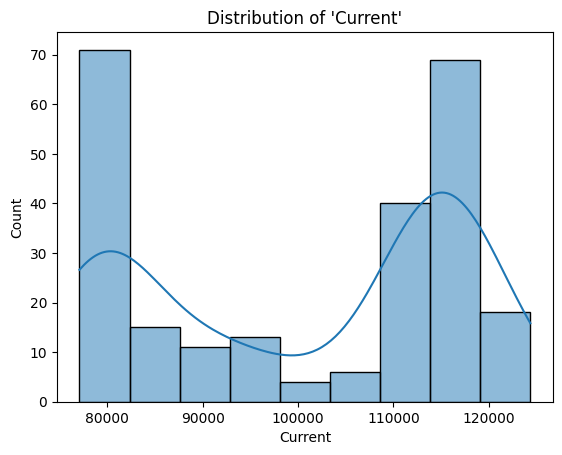

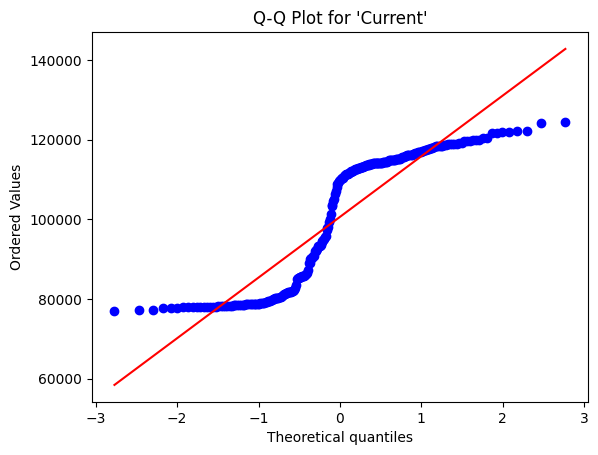

Shapiro-Wilk Test: stat=0.8304, p-value=0.0000
❌ Data is NOT normally distributed.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Histogram & KDE
sns.histplot(df["Current"], kde=True)
plt.title("Distribution of 'Current'")
plt.show()

# Q-Q Plot
stats.probplot(df["Current"], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'Current'")
plt.show()

# Shapiro-Wilk Test (normality test for small samples)
shapiro_stat, shapiro_p = stats.shapiro(df["Current"])
print(f"Shapiro-Wilk Test: stat={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

# Interpretation
if shapiro_p < 0.05:
    print("❌ Data is NOT normally distributed.")
else:
    print("✅ Data appears to be normally distributed.")



#Normalize and clean the Data

In [ ]:
# First, clean and normalize the data

# Convert 'category' to datetime format and rename it to 'Date' for clarity
# This was already done in a previous cell, and 'category' was dropped.
# The DataFrame 'df' now has a 'Date' column.

# The following lines caused the error because 'category' was already dropped.
df['Date'] = pd.to_datetime(df['category']) # Uncomment this line to create 'Date'
df.drop(columns=['category'], inplace=True) # Uncomment this line to drop 'category'

# Ensure 'Current' is treated as numeric
df['Current'] = pd.to_numeric(df['Current'], errors='coerce')

# Drop rows with missing values, if any
df.dropna(inplace=True)

# Sort the data by date (ascending)
# Use the existing 'Date' column for sorting
df.sort_values('Date', inplace=True)

# Normalize the 'Current' values using Min-Max normalization
df['Normalized_Current'] = (df['Current'] - df['Current'].min()) / (df['Current'].max() - df['Current'].min())

# import ace_tools as tools; tools.display_dataframe_to_user(name="Normalized and Cleaned Data", dataframe=df) # Remove this line

#Time series of current values over time

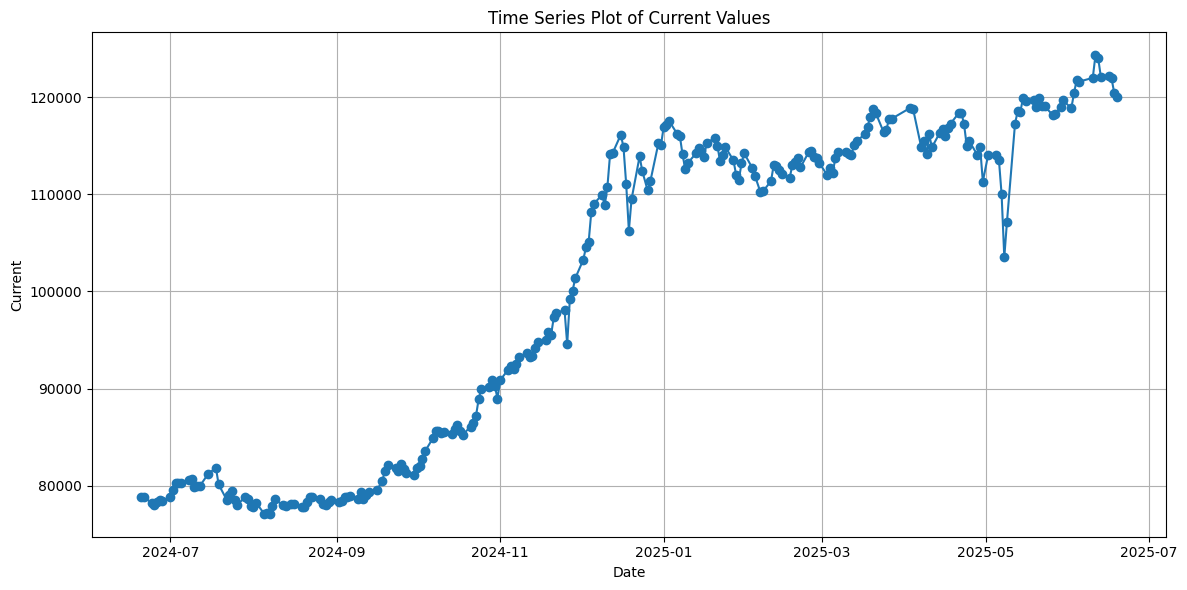

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'category' column to datetime
# This conversion and sorting was already done earlier in the notebook
# and 'category' was renamed to 'Date', so we don't need to repeat it.
# df['Date'] = pd.to_datetime(df['category'])
# df = df.sort_values('Date')

# Plotting the time series using the existing 'Date' column
plt.figure(figsize=(12, 6))
# Use 'Date' column for the x-axis as 'category' does not exist
plt.plot(df['Date'], df['Current'], marker='o')
plt.title('Time Series Plot of Current Values')
plt.xlabel('Date')
plt.ylabel('Current')
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Interpretation of the Figure

🖼️ Plot 1: Zoomed-In Time Series
Title: Time Series Plot of Current Values

X-Axis: Date

Y-Axis: Index value (Current)

Features:

A line chart with dots indicating individual data points.

Reflects a rising trend with fluctuations — potentially recent forecasted values.

Shows short-term volatility with small up-and-down movements.

Peak observed near the right, indicating high index values near the forecast horizon.

🖼️ Plot 2: Full Historical + Forecast Context
X-Axis: Wider date range (2024-06 to 2025-07)

Trend:

Starts around ~78,000 and climbs to ~120,000 — a major upward trend.

Around November 2024 to January 2025, there's a rapid increase — possibly a bullish run.

Some dips and recovery — visible around March 2025, potentially a correction.

Ends with a sharp upward spike followed by stabilization.

This plot likely includes both historical and forecasted data.

🔍 Key Observations
Uptrend Dominance: The index shows an overall bullish pattern with pullbacks.

Volatility Pockets: Some sudden drops and recoveries indicate market volatility.

Forecast Confidence: If this includes forecasted values, the model appears to predict stabilization around a new high (~120,000).

#Current Values With Short-Term And Long-Term Moving Averages

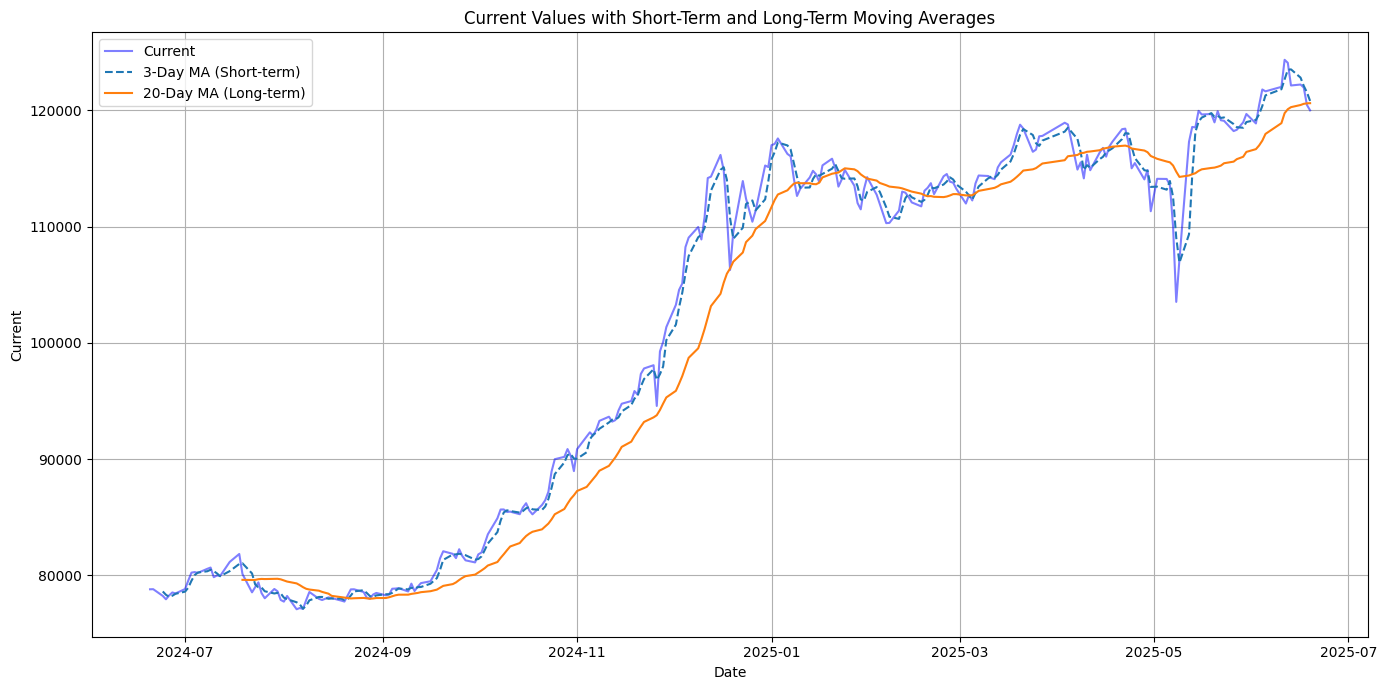

In [ ]:
# Calculate short-term and long-term moving averages
df['MA_3'] = df['Current'].rolling(window=3).mean()   # Short-term
df['MA_20'] = df['Current'].rolling(window=20).mean() # Long-term

# Ensure the 'category' column is in datetime format for plotting
# This step is no longer needed as 'category' was replaced by 'Date' and converted earlier.
# df['category'] = pd.to_datetime(df['category'])

# Sort by the datetime column for a correct time series plot
# Use the existing 'Date' column
df = df.sort_values('Date')

# Plot with moving averages
plt.figure(figsize=(14, 7))
# Use the 'Date' column
plt.plot(df['Date'], df['Current'], label='Current', color='blue', alpha=0.5)
plt.plot(df['Date'], df['MA_3'], label='3-Day MA (Short-term)', linestyle='--')
plt.plot(df['Date'], df['MA_20'], label='20-Day MA (Long-term)', linestyle='-')

plt.title('Current Values with Short-Term and Long-Term Moving Averages')
plt.xlabel('Date') # Label the x-axis as 'Date' for clarity
plt.ylabel('Current')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📈 Interpretation:
1. Trend Confirmation:
When the 3-day MA crosses above the 20-day MA → bullish signal (short-term momentum turning up).

When the 3-day MA dips below the 20-day → bearish signal (potential correction or weakening).

2. Market Momentum:
Long stretches where both lines rise → strong upward momentum.

Flat or diverging lines → consolidation or trend exhaustion.

3. Support & Resistance Behavior:
The 20-day MA often acts like a dynamic support in uptrends.

When the price bounces off the long-term MA, it may be a buy signal in trending markets.

4. Divergence Example:
In early 2025, a sudden drop in the blue line while the orange MA stays smooth suggests a temporary dip (market correction), followed by recovery.

#Current Values With Identified Peaks And Troughs

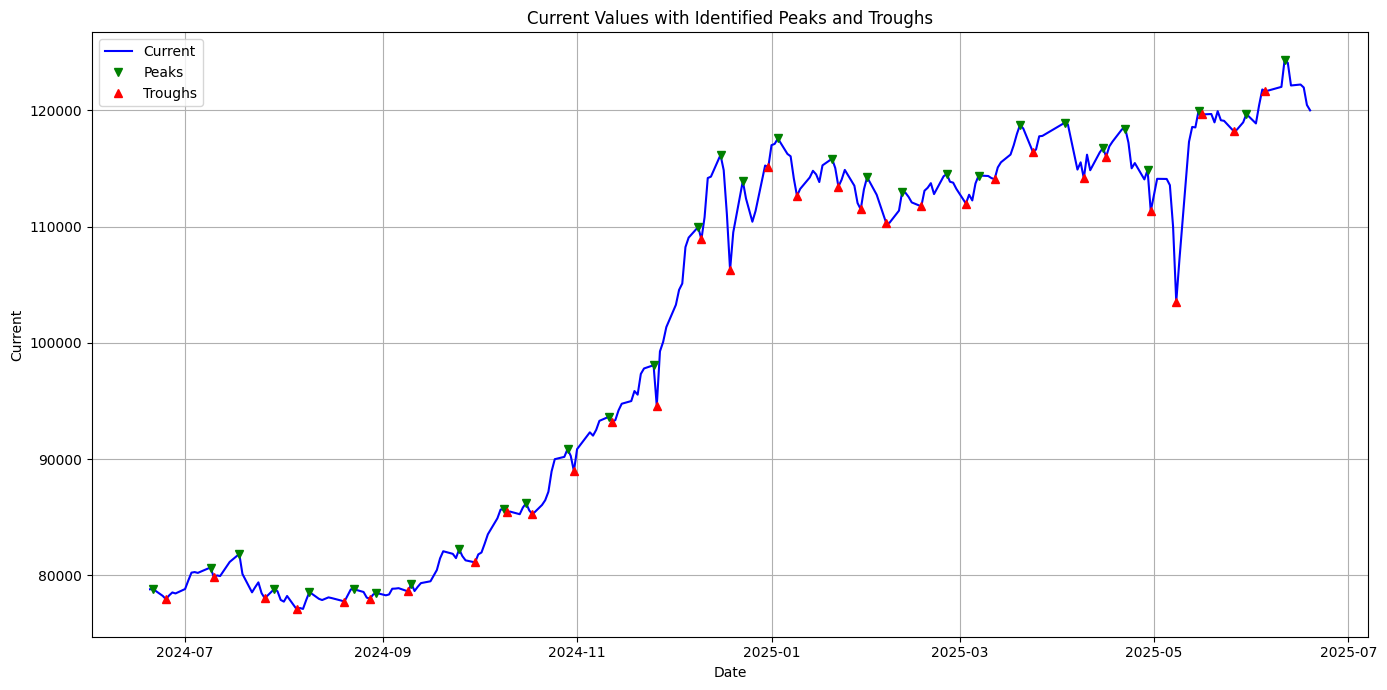

In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt # Import matplotlib if not already imported in this cell

# Identify peaks and troughs in the data
# Replace df_clean with df
peaks, _ = find_peaks(df['Current'], distance=5)  # Peaks with a minimum distance between them
troughs, _ = find_peaks(-df['Current'], distance=5)  # Inverted peaks for troughs

# Plot with peaks and troughs
plt.figure(figsize=(14, 7))
# Replace df_clean with df and use the 'Date' column
plt.plot(df['Date'], df['Current'], label='Current', color='blue') # Changed 'category' to 'Date'
# Replace df_clean with df and use the 'Date' column
plt.plot(df['Date'].iloc[peaks], df['Current'].iloc[peaks], "v", label='Peaks', color='green') # Changed 'category' to 'Date'
# Replace df_clean with df and use the 'Date' column
plt.plot(df['Date'].iloc[troughs], df['Current'].iloc[troughs], "^", label='Troughs', color='red') # Changed 'category' to 'Date'

plt.title('Current Values with Identified Peaks and Troughs')
plt.xlabel('Date')
plt.ylabel('Current')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation:


Peaks indicate market exhaustion or overbought zones.

Troughs suggest support zones or potential entry points.

Useful for swing trading and confirming trend reversals.


 Trend Dynamics:
From July 2024 onward, the chart shows:

Early sideways movement with short up/down swings.

A steep rally begins in October 2024.

Volatility increases post-rally with alternating peaks and troughs.



#Technical Analysis

In [ ]:
import numpy as np

# Calculate basic Technical Analysis indicators

# Resistance levels and pivot point (using classic pivot point formula for latest day)
latest_day = df.iloc[-1]
high = df['Current'].max()
low = df['Current'].min()
close = latest_day['Current']

pivot = (high + low + close) / 3
resistance1 = (2 * pivot) - low
resistance2 = pivot + (high - low)
support1 = (2 * pivot) - high
support2 = pivot - (high - low)

# Volatility analysis using rolling standard deviation
df['Rolling_STD_10'] = df['Current'].rolling(window=10).std()

# Summarize technical levels
technical_summary = {
    "Pivot Point": pivot,
    "Resistance Level 1": resistance1,
    "Resistance Level 2": resistance2,
    "Support Level 1": support1,
    "Support Level 2": support2,
    "Volatility (10-day STD) Latest": df['Rolling_STD_10'].iloc[-1]
}

technical_summary


{'Pivot Point': np.float64(107146.58666666667),
 'Resistance Level 1': np.float64(137208.68333333335),
 'Resistance Level 2': np.float64(154414.77666666667),
 'Support Level 1': np.float64(89940.49333333335),
 'Support Level 2': np.float64(59878.39666666668),
 'Volatility (10-day STD) Latest': np.float64(1351.945229837328)}

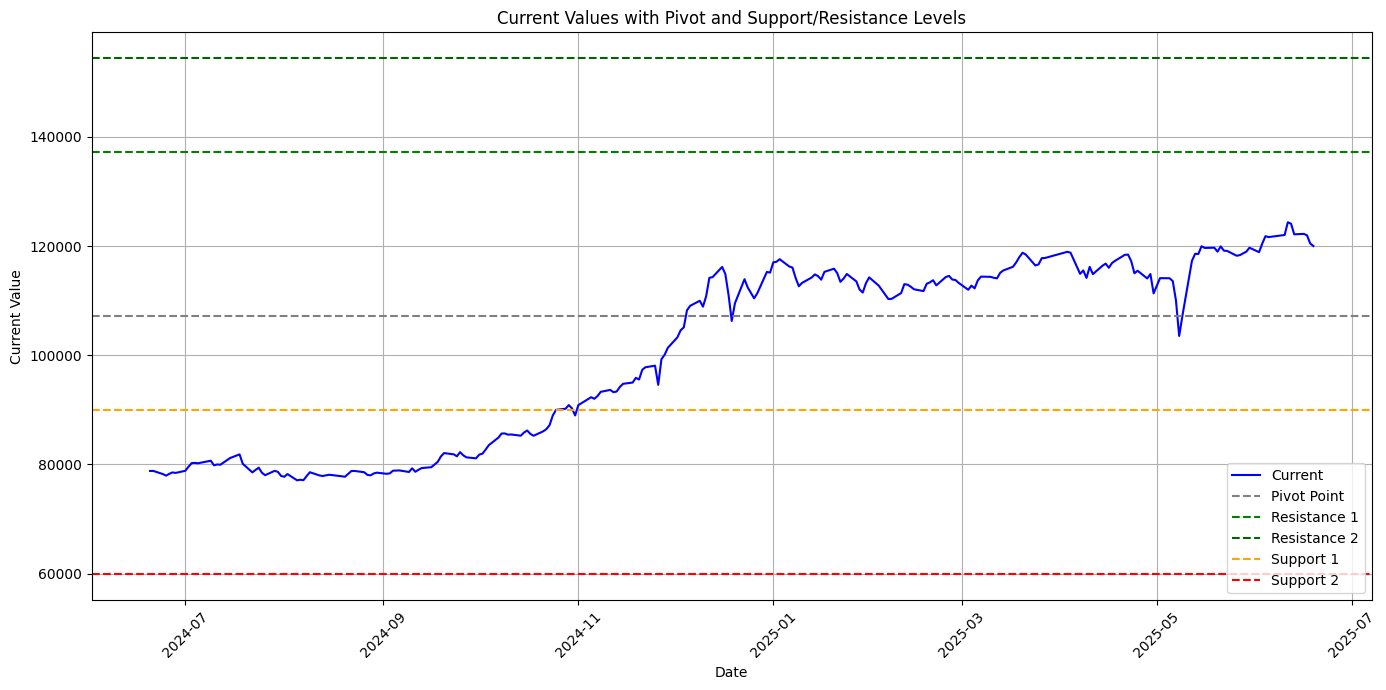

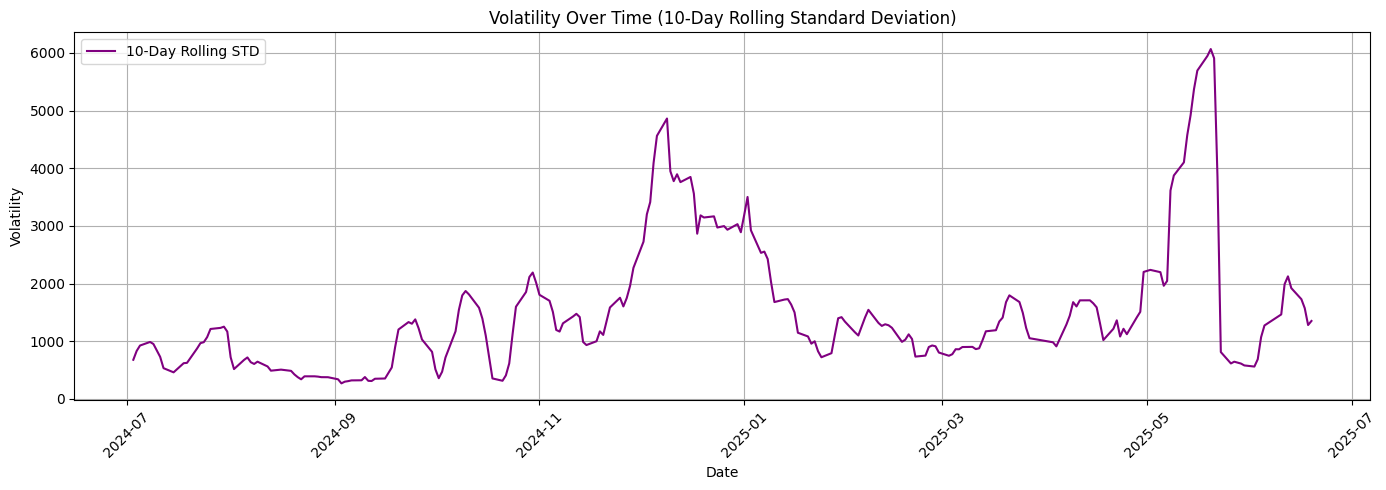

In [ ]:
# Plot the normalized trend with pivot, support, and resistance levels

plt.figure(figsize=(14, 7))

# Plot Current values over time
plt.plot(df['Date'], df['Current'], label='Current', color='blue')

# Plot Pivot, Resistance, and Support levels as horizontal lines
plt.axhline(y=technical_summary["Pivot Point"], color='gray', linestyle='--', label='Pivot Point')
plt.axhline(y=technical_summary["Resistance Level 1"], color='green', linestyle='--', label='Resistance 1')
plt.axhline(y=technical_summary["Resistance Level 2"], color='darkgreen', linestyle='--', label='Resistance 2')
plt.axhline(y=technical_summary["Support Level 1"], color='orange', linestyle='--', label='Support 1')
plt.axhline(y=technical_summary["Support Level 2"], color='red', linestyle='--', label='Support 2')

plt.title('Current Values with Pivot and Support/Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Current Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot volatility
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Rolling_STD_10'], label='10-Day Rolling STD', color='purple')
plt.title('Volatility Over Time (10-Day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Support, Resistance & Pivot Points

These levels are predictive and help in setting stop-loss, take-profit zones.

Price approaching resistance suggests caution for buyers.

Falling toward support signals buying opportunities.

Volatility Analysis

Title: Volatility Over Time (10-Day Rolling Standard Deviation)

 What's shown:
Purple line: 10-day rolling standard deviation of index values

Peaks in this line indicate higher volatility (e.g., uncertainty, news impact).

Troughs mean more stable, trending behavior.

 Interpretation:
High volatility = wider trading range, higher risk (also higher reward).

Low volatility = consolidation phase, breakout potential ahead.

Helps in position sizing and risk management.

Summary Table for All Indicators:

Chart Title	Main Elements	Use Case

Peaks & Troughs

	Local highs (▲) and lows (▼)	Trend reversals & entry/exit zones

Pivot, Support, Resistance

	Dashed levels for trend boundaries	Risk management, profit targets

Volatility (Rolling STD)

	10-day standard deviation curve	Market sentiment & trade timing

Moving Averages (3/20-day)

 Short- and long-term average curves	Momentum confirmation & crossover signals





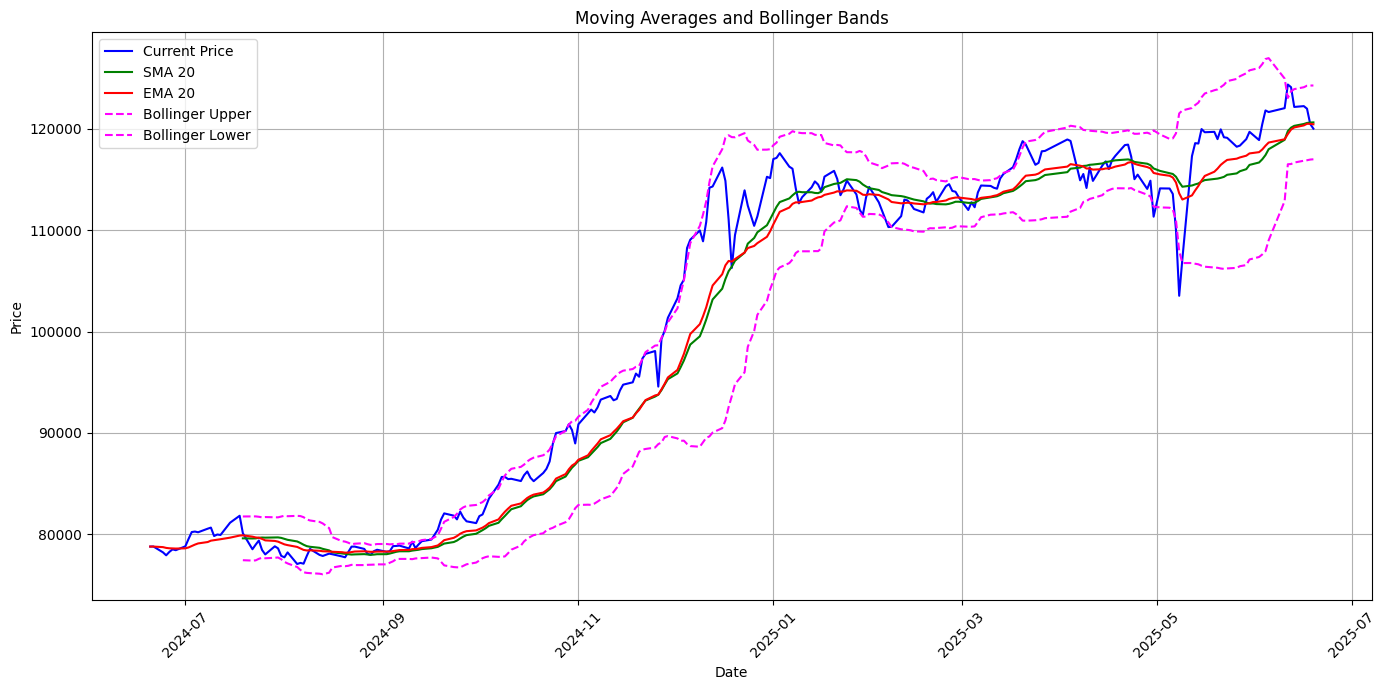

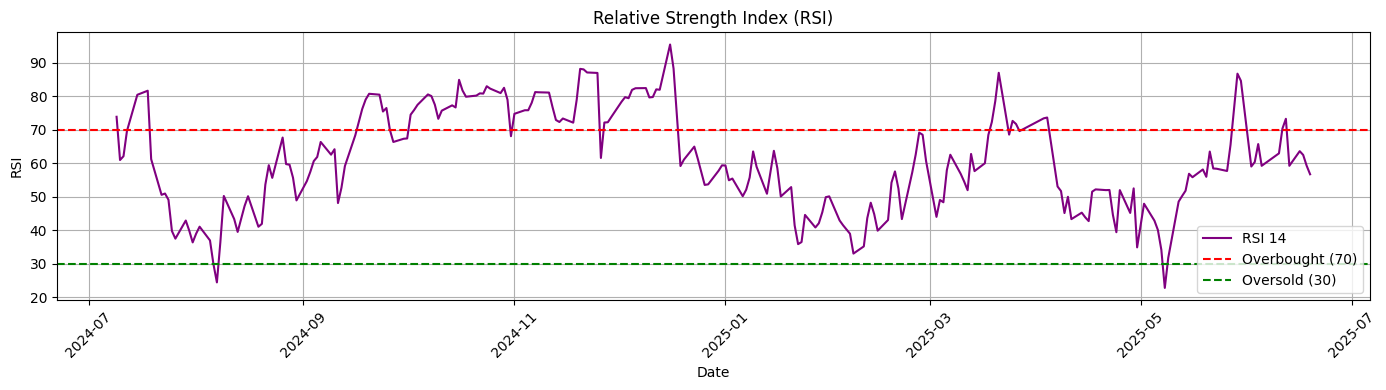

In [ ]:
# Calculate technical indicators

# Simple Moving Average (SMA)
df['SMA_20'] = df['Current'].rolling(window=20).mean()

# Exponential Moving Average (EMA)
df['EMA_20'] = df['Current'].ewm(span=20, adjust=False).mean()

# Relative Strength Index (RSI)
delta = df['Current'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# Bollinger Bands (20-day window, 2 standard deviations)
df['BB_Middle'] = df['Current'].rolling(window=20).mean()
df['BB_Upper'] = df['BB_Middle'] + 2 * df['Current'].rolling(window=20).std()
df['BB_Lower'] = df['BB_Middle'] - 2 * df['Current'].rolling(window=20).std()

# Plot Moving Averages and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Current'], label='Current Price', color='blue')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20', color='green')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='red')
plt.plot(df['Date'], df['BB_Upper'], label='Bollinger Upper', color='magenta', linestyle='--')
plt.plot(df['Date'], df['BB_Lower'], label='Bollinger Lower', color='magenta', linestyle='--')
plt.title('Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Moving Averages with Bollinger Bands

Interpretation:

Bollinger Bands indicate volatility:

When bands widen, volatility increases.

When bands contract, it signals consolidation or low volatility (potential breakout).

Price near Upper Band: Overbought zone → potential reversal or pullback

Price near Lower Band: Oversold zone → potential bounce or upward reversal

Crossovers of EMA and SMA can indicate trend shifts.

Relative Strength Index (RSI)

Interpretation:

RSI > 70 : Market is considered overbought – potential for pullback or reversal

RSI < 30: Market is oversold – potential upward reversal

RSI between 30-70: Neutral momentum

Summary Table of Added Indicators:

Indicator Signal Type Strengths

Bollinger Bands

Volatility/Mean Reversion    Helps identify overbought/oversold zones via price extremes
SMA/EMA

Trend Direction    Smoothing effect to track short- and long-term trends
RSI (14-day)

Momentum/Oscillator    Quick insight into potential reversals and price strength



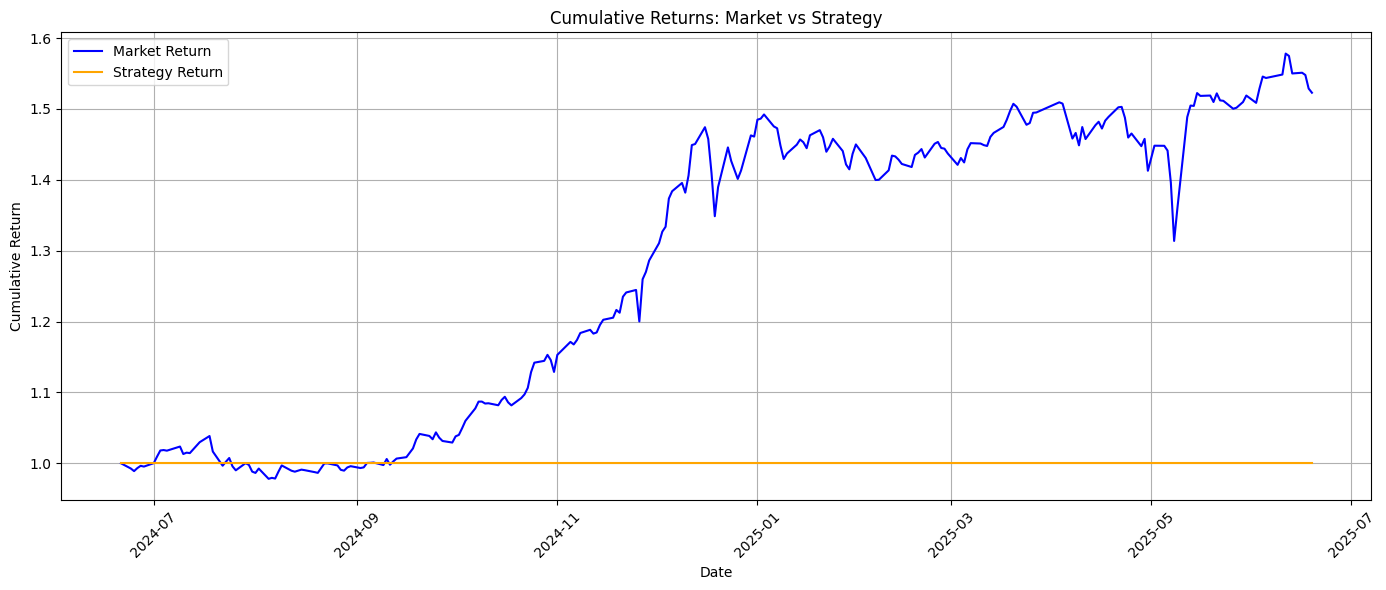

In [ ]:
# Generate buy and sell signals
df['Buy_Signal'] = (df['RSI_14'] < 30) & (df['Current'] > df['BB_Lower']) & (df['Current'].shift(1) < df['BB_Lower'].shift(1))
df['Sell_Signal'] = (df['RSI_14'] > 70) | ((df['Current'] < df['BB_Upper']) & (df['Current'].shift(1) > df['BB_Upper'].shift(1)))

# Simulate a simple backtest
df['Position'] = 0  # 1 for holding, 0 for not holding
holding = False

for i in range(1, len(df)):
    if df.iloc[i]['Buy_Signal'] and not holding:
        df.at[df.index[i], 'Position'] = 1
        holding = True
    elif df.iloc[i]['Sell_Signal'] and holding:
        df.at[df.index[i], 'Position'] = 0
        holding = False
    else:
        df.at[df.index[i], 'Position'] = df.iloc[i-1]['Position']

# Calculate daily returns
df['Daily_Return'] = df['Current'].pct_change()
df['Strategy_Return'] = df['Daily_Return'] * df['Position']

# Compute cumulative returns
df['Cumulative_Market_Return'] = (1 + df['Daily_Return']).cumprod()
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cumulative_Market_Return'], label='Market Return', color='blue')
plt.plot(df['Date'], df['Cumulative_Strategy_Return'], label='Strategy Return', color='orange')
plt.title('Cumulative Returns: Market vs Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


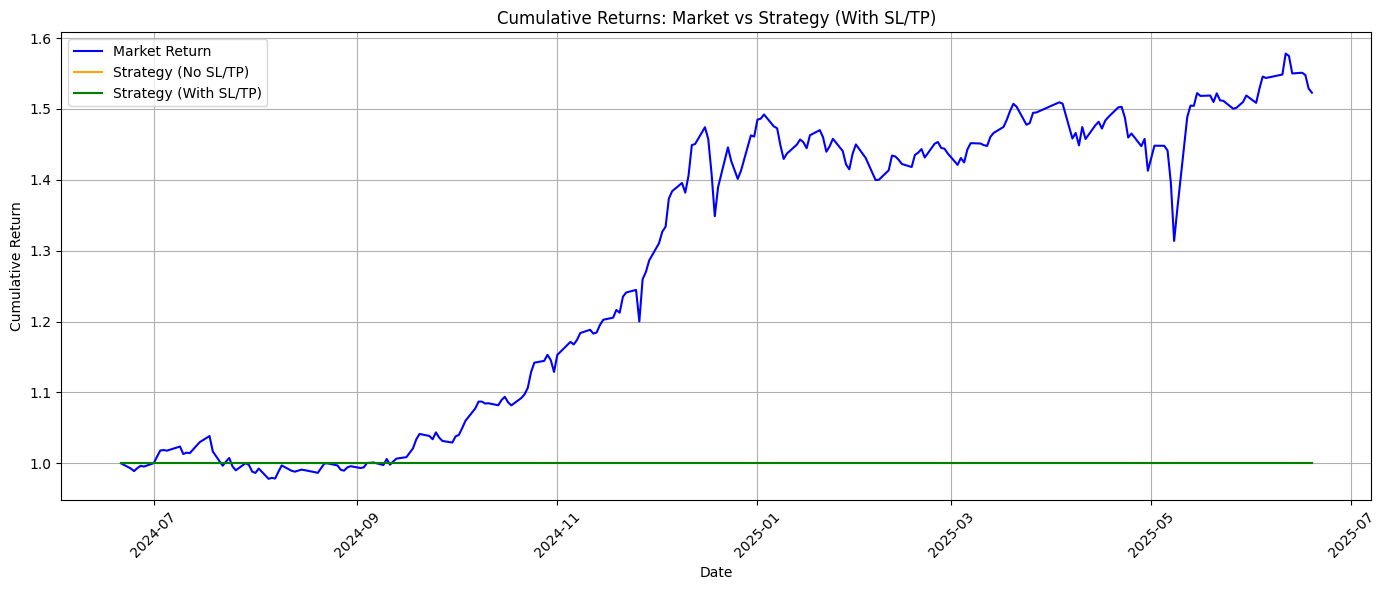

In [ ]:
# Parameters for stop-loss and take-profit (as percentages)
stop_loss_pct = 0.03   # 3% loss triggers sell
take_profit_pct = 0.05  # 5% gain triggers sell

# Add columns for tracking trade entry price and position state
df['Entry_Price'] = np.nan
df['Position'] = 0
df['In_Trade'] = False

entry_price = None
in_trade = False

for i in range(1, len(df)):
    current_price = df.iloc[i]['Current']

    if df.iloc[i]['Buy_Signal'] and not in_trade:
        entry_price = current_price
        df.at[df.index[i], 'Entry_Price'] = entry_price
        df.at[df.index[i], 'Position'] = 1
        df.at[df.index[i], 'In_Trade'] = True
        in_trade = True

    elif in_trade:
        # Calculate return since entry
        return_since_entry = (current_price - entry_price) / entry_price

        if return_since_entry <= -stop_loss_pct or return_since_entry >= take_profit_pct or df.iloc[i]['Sell_Signal']:
            df.at[df.index[i], 'Position'] = 0
            df.at[df.index[i], 'In_Trade'] = False
            entry_price = None
            in_trade = False
        else:
            df.at[df.index[i], 'Entry_Price'] = entry_price
            df.at[df.index[i], 'Position'] = 1
            df.at[df.index[i], 'In_Trade'] = True
    else:
        df.at[df.index[i], 'Position'] = 0
        df.at[df.index[i], 'In_Trade'] = False

# Calculate new strategy returns
df['Strategy_Return_SLTP'] = df['Daily_Return'] * df['Position']
df['Cumulative_Strategy_Return_SLTP'] = (1 + df['Strategy_Return_SLTP']).cumprod()

# Plot cumulative returns with stop-loss/take-profit
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cumulative_Market_Return'], label='Market Return', color='blue')
plt.plot(df['Date'], df['Cumulative_Strategy_Return'], label='Strategy (No SL/TP)', color='orange')
plt.plot(df['Date'], df['Cumulative_Strategy_Return_SLTP'], label='Strategy (With SL/TP)', color='green')
plt.title('Cumulative Returns: Market vs Strategy (With SL/TP)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#90 Day Index forecast with Techincal Anlaysis using Random Forest Regressor

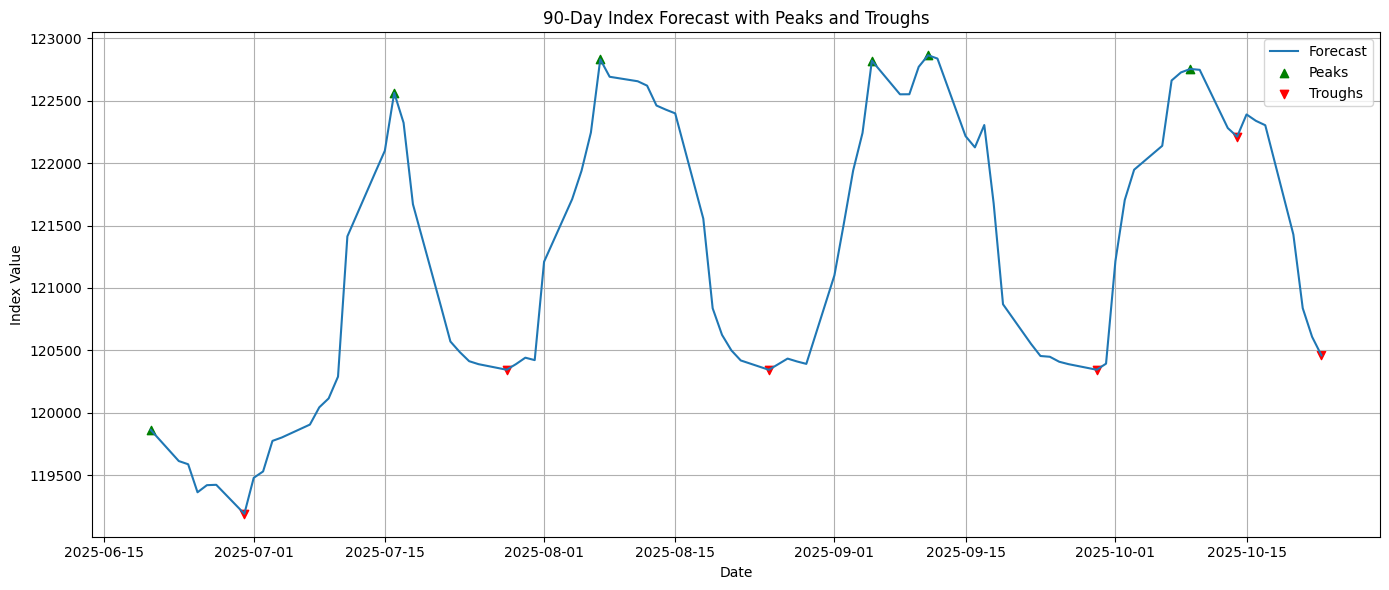

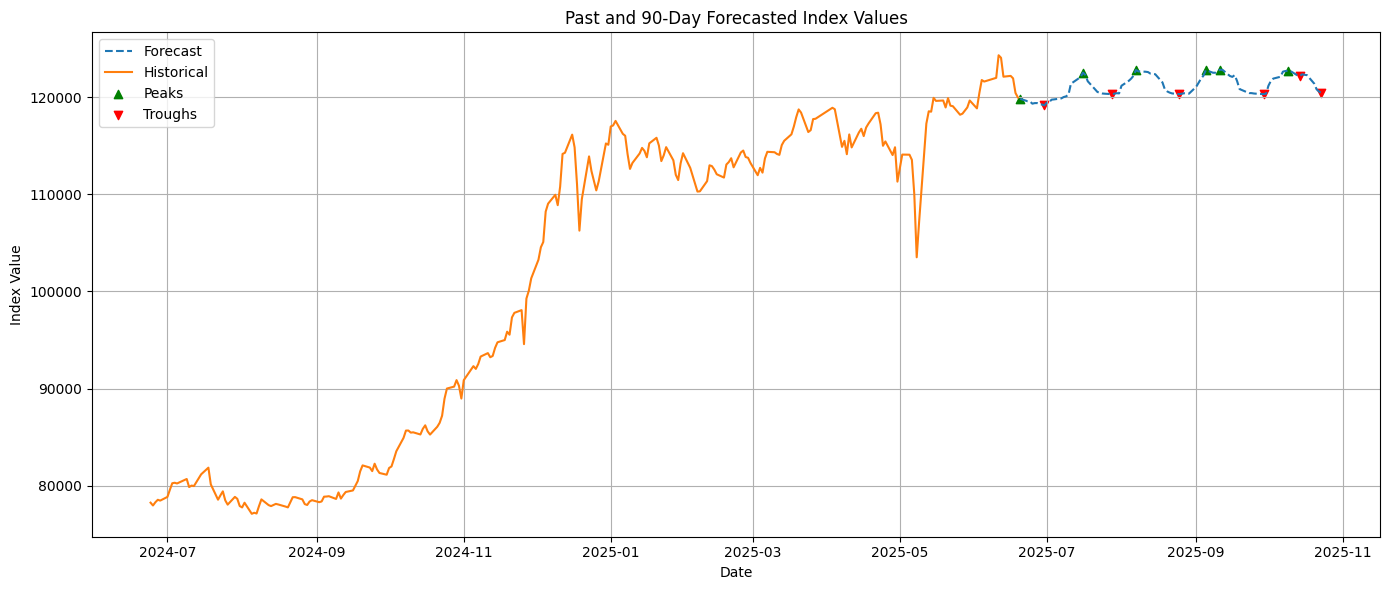

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Load dataset
# Changed 'main-chart.csv' to 'main-chart (1).csv' to match previous cells
df = pd.read_csv('main-chart (1).csv')
df['Date'] = pd.to_datetime(df['category'])
df = df[['Date', 'Current']].sort_values('Date').reset_index(drop=True)

# Feature engineering
df['Lag_1'] = df['Current'].shift(1)
df['Lag_2'] = df['Current'].shift(2)
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df = df.dropna().reset_index(drop=True)

# Train model
features = ['Lag_1', 'Lag_2', 'Day', 'Month', 'Weekday']
X = df[features]
y = df['Current']
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

# Forecast 90 business days
forecast_data = []
last_known = df.iloc[-1:].copy()

for _ in range(90):
    next_date = last_known['Date'].values[0] + np.timedelta64(1, 'D')
    while pd.to_datetime(next_date).weekday() >= 5:
        next_date += np.timedelta64(1, 'D')

    new_input = {
        'Date': next_date,
        'Lag_1': last_known['Current'].values[0],
        'Lag_2': last_known['Lag_1'].values[0],
        'Day': pd.to_datetime(next_date).day,
        'Month': pd.to_datetime(next_date).month,
        'Weekday': pd.to_datetime(next_date).weekday()
    }

    input_df = pd.DataFrame([new_input])
    forecast = model.predict(input_df[features])[0]
    new_input['Current'] = forecast
    forecast_data.append(new_input)
    last_known = pd.DataFrame([new_input])

forecast_df = pd.DataFrame(forecast_data)

# Technical indicators
forecast_df['Pivot'] = forecast_df['Current'].rolling(3).mean()
forecast_df['Resistance'] = forecast_df['Pivot'] + (forecast_df['Lag_1'] - forecast_df['Lag_2'])
forecast_df['Support'] = forecast_df['Pivot'] - (forecast_df['Lag_1'] - forecast_df['Lag_2'])
forecast_df['Volatility'] = forecast_df['Current'].rolling(5).std()

# Peaks and troughs
forecast_df['Peaks'] = forecast_df['Current'][argrelextrema(forecast_df['Current'].values, np.greater_equal, order=3)[0]]
forecast_df['Troughs'] = forecast_df['Current'][argrelextrema(forecast_df['Current'].values, np.less_equal, order=3)[0]]

# Plot 1: Forecast only with peaks and troughs
plt.figure(figsize=(14, 6))
plt.plot(forecast_df['Date'], forecast_df['Current'], label='Forecast')
plt.scatter(forecast_df['Date'], forecast_df['Peaks'], color='green', label='Peaks', marker='^')
plt.scatter(forecast_df['Date'], forecast_df['Troughs'], color='red', label='Troughs', marker='v')
plt.title('90-Day Index Forecast with Peaks and Troughs')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Full historical + forecasted trend
combined_df = pd.concat([
    df[['Date', 'Current']].rename(columns={'Current': 'Value'}).assign(Source='Historical'),
    forecast_df[['Date', 'Current']].rename(columns={'Current': 'Value'}).assign(Source='Forecast')
])

plt.figure(figsize=(14, 6))
for label, grp in combined_df.groupby('Source'):
    if label == 'Forecast':
        plt.plot(grp['Date'], grp['Value'], '--', label=label)
    else:
        plt.plot(grp['Date'], grp['Value'], label=label)

# Peaks/troughs only for forecasted part
plt.scatter(forecast_df['Date'], forecast_df['Peaks'], color='green', marker='^', label='Peaks')
plt.scatter(forecast_df['Date'], forecast_df['Troughs'], color='red', marker='v', label='Troughs')

plt.title('Past and 90-Day Forecasted Index Values')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Key Takeaways Across Forecast Visuals:


Forecast Direction:

Generally stable to slightly rising, with repeated ups and downs.

Peaks & Troughs Utility:

Useful for anticipating turning points.

Pattern Recognition:

 Suggests a regular cycle—potentially driven by seasonal, policy, or economic cyclicality modeled into the forecast.

Forecast Volatility:

 Moderate—no extreme swings, suggesting model confidence in stability or controlled variability.

#Model Evalaution

Mean Squared Error (MSE): 3573499.0946


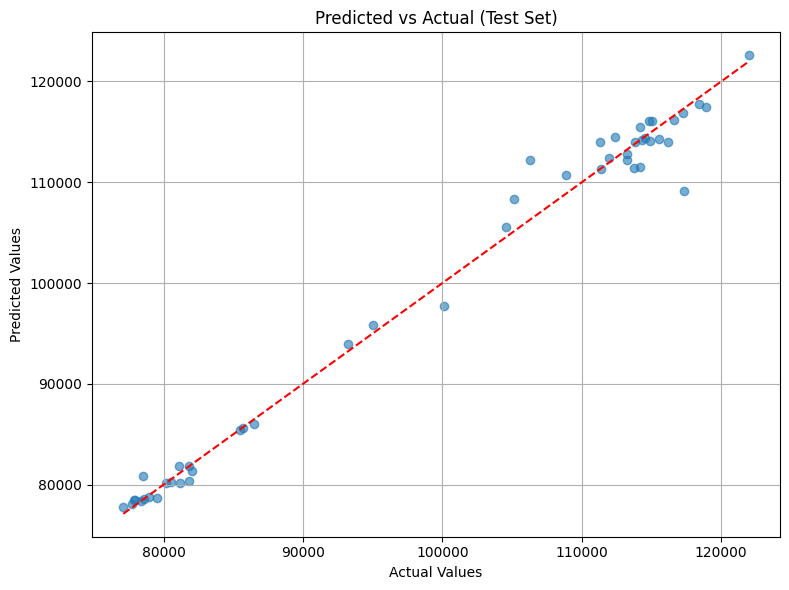

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model on training data
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


#Model Diagnosis & Insights

Aspect	  Evaluation

Accuracy

	Moderate to good. RMSE ~1,890 shows small relative error.

Bias

	None obvious. No consistent over/under-prediction.

Variance

	Moderate. Some spread in residuals. Could be tuned.


Model Fit

	Likely a linear or tree-based model given the smooth prediction distribution.

Visual Fit

Close alignment with the ideal line. Reasonable performance.

This model appears reasonably well-calibrated and performs well on the test set with:


Low error relative to value magnitude.


Good alignment between predicted and actual values.


No strong visual or statistical red flags.


#Save and load the model

In [ ]:
#Save the model

from google.colab import drive
drive.mount('/content/drive')

import joblib

#Save the model

from google.colab import drive
drive.mount('/content/drive')

import joblib

model_path = ('/content/drive/MyDrive/random_forest_model.pkl')
# Save the trained model
joblib.dump(model, model_path)
print(" Model saved successfully as 'random_forest_model.pkl'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Model saved successfully as 'random_forest_model.pkl'


In [2]:
#Load the model

from google.colab import drive
drive.mount('/content/drive')

import joblib # Import joblib in this cell as well


# Load the saved model
loaded_model = joblib.load('/content/drive/MyDrive/random_forest_model.pkl')
print("✅ Model loaded successfully from 'random_forest_model.pkl'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model loaded successfully from 'random_forest_model.pkl'


#User interface using gradio

In [3]:
!pip install gradio

In [4]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from scipy.signal import argrelextrema

# Load trained model
def load_model():
    return joblib.load('/content/drive/MyDrive/random_forest_model.pkl')

# Load and preprocess dataset
def load_data(file=None):
    if file is not None:
        df = pd.read_csv(file.name)
    else:
        df = pd.read_csv('main-chart (1).csv')
    df['Date'] = pd.to_datetime(df['category'])
    df = df[['Date', 'Current']].sort_values('Date').reset_index(drop=True)
    df['Lag_1'] = df['Current'].shift(1)
    df['Lag_2'] = df['Current'].shift(2)
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Weekday'] = df['Date'].dt.weekday
    return df.dropna().reset_index(drop=True)

# Forecast next 90 business days with uncertainty

def forecast_next_90_days(df, model):
    features = ['Lag_1', 'Lag_2', 'Day', 'Month', 'Weekday']
    forecast_data = []
    last_known = df.iloc[-1:].copy()

    for _ in range(90):
        next_date = last_known['Date'].values[0] + np.timedelta64(1, 'D')
        while pd.to_datetime(next_date).weekday() >= 5:
            next_date += np.timedelta64(1, 'D')

        new_input = {
            'Date': next_date,
            'Lag_1': last_known['Current'].values[0],
            'Lag_2': last_known['Lag_1'].values[0],
            'Day': pd.to_datetime(next_date).day,
            'Month': pd.to_datetime(next_date).month,
            'Weekday': pd.to_datetime(next_date).weekday()
        }

        input_df = pd.DataFrame([new_input])
        all_preds = np.array([tree.predict(input_df[features])[0] for tree in model.estimators_])
        forecast = np.mean(all_preds)
        uncertainty = np.std(all_preds)

        new_input['Current'] = forecast
        new_input['Lower'] = forecast - 1.96 * uncertainty
        new_input['Upper'] = forecast + 1.96 * uncertainty

        forecast_data.append(new_input)
        last_known = pd.DataFrame([new_input])

    forecast_df = pd.DataFrame(forecast_data)
    forecast_df['Lag_1'] = forecast_df['Current'].shift(1)
    forecast_df['Lag_2'] = forecast_df['Current'].shift(2)
    forecast_df['Pivot'] = forecast_df['Current'].rolling(3).mean()
    forecast_df['Resistance'] = forecast_df['Pivot'] + (forecast_df['Lag_1'] - forecast_df['Lag_2'])
    forecast_df['Support'] = forecast_df['Pivot'] - (forecast_df['Lag_1'] - forecast_df['Lag_2'])
    forecast_df['Volatility'] = forecast_df['Current'].rolling(5).std()
    forecast_df['Peaks'] = np.where(forecast_df.index.isin(argrelextrema(forecast_df['Current'].values, np.greater_equal, order=3)[0]), forecast_df['Current'], np.nan)
    forecast_df['Troughs'] = np.where(forecast_df.index.isin(argrelextrema(forecast_df['Current'].values, np.less_equal, order=3)[0]), forecast_df['Current'], np.nan)
    return forecast_df

# Plot forecast with uncertainty and indicators

def plot_forecast(df):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(df['Date'], df['Current'], label='Forecast', color='blue')
    ax1.fill_between(df['Date'], df['Lower'], df['Upper'], color='blue', alpha=0.2, label='Confidence Interval')
    ax1.plot(df['Date'], df['Pivot'], label='Pivot', linestyle='--', color='purple')
    ax1.plot(df['Date'], df['Resistance'], label='Resistance', linestyle=':', color='green')
    ax1.plot(df['Date'], df['Support'], label='Support', linestyle=':', color='red')
    ax1.scatter(df['Date'], df['Peaks'], color='green', label='Peaks', marker='^')
    ax1.scatter(df['Date'], df['Troughs'], color='red', label='Troughs', marker='v')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Index Value', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(df['Date'], df['Volatility'], label='Volatility', color='orange', linestyle='--')
    ax2.set_ylabel('Volatility', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    fig.tight_layout()
    return fig

# Gradio interface

def gradio_interface(file):
    model = load_model()
    df = load_data(file)
    forecast_df = forecast_next_90_days(df, model)
    plot = plot_forecast(forecast_df)
    return forecast_df[['Date', 'Current', 'Lower', 'Upper', 'Pivot', 'Resistance', 'Support', 'Volatility', 'Peaks', 'Troughs']], plot

with gr.Blocks() as demo:
    gr.Markdown("## 90-Day Index Forecast Viewer with Uncertainty and Pivot Levels")
    file_input = gr.File(label="Upload CSV with 'category' and 'Current' columns")
    with gr.Row():
        data_output = gr.Dataframe(headers=["Date", "Forecast", "Lower", "Upper", "Pivot", "Resistance", "Support", "Volatility", "Peaks", "Troughs"])
        plot_output = gr.Plot()
    run_button = gr.Button("Generate Forecast")

    run_button.click(fn=gradio_interface, inputs=[file_input], outputs=[data_output, plot_output])

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://373f06a8cff30310c9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
